# Decision Trees

## Table of Contents:

1. [Background Reading](#background-reading)
2. [Dataset Explanation: Mushroom](#dataset-mushroom)
3. [Decision Tree Terminology](#decision-tree-terminology)
4. [CART - Classification and Regression Trees](#cartclassification-and-regression-trees)
5. [Entropy](#entropy)
6. [Information Gain](#information-gain)
7. [Gini Index](#gini-index)
8. [Pruning](#pruning)
9. [Example 1: Bill Authentication](#example-1-bill-authentication)
10. [Example 2: Mushroom](#example-2-mushroom)

    
    10.1 [Importing Libraries and Dataset](#importing-libraries-and-dataset)
    
    10.2 [Exploratory Data Analysis](#exploratory-data-analysis)
    
    10.3 [Separating Features and Target](#separating-features-and-target)
    
    10.4 [Splitting Dataset to Training and Test Data](#splitting-dataset-to-training-and-test-data)
    
    10.5 [Decision Tree Creation](#decision-tree-creation)
    
    10.6 [Creation of Decision Tree Using Gini Index](#creation-of-decision-tree-using-gini-index)
    
    10.7 [Creation of Decision Tree Using Entropy](#creation-of-decision-tree-using-with-entropy)
    
    10.8 [Confusion Matrix](#confusion-matrix)
    
    10.9 [Conclusion](#conclusion)
12. [Example 3 for Practice](#example-3-practice)


## Background reading

**Suggested Reading:**

*Intro to Statistical Learning*: 8.1 The Basics of Decision Trees, 8.1.2 Classification Trees

**Optional Reading:**

*Ethical Algorithm*: Chapter 1, Algorithmic Privacy, A Bad Solution, (pp. 26-31)

*Ethical Algorithm*: Chapter 4, Lost in the Garden, Led Astray by data, (pp. 137-143)

**Supporting Materials:**

To understand more, check this [article](https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/)

For better understanding with an example, check this medium [article](https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575)

To learn about how to calculate Entropy and Information Gain mathematically, check this medium [article](https://medium.com/codex/decision-tree-for-classification-entropy-and-information-gain-cd9f99a26e0d)

## Dataset Explanation: Mushroom

**The example uses the *Mushroom Classification* dataset from kaggle [link](https://www.kaggle.com/datasets/uciml/mushroom-classification)**

1. Attribute Information: (classes: edible=e, poisonous=p)

2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

5. bruises: bruises=t,no=f

6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

7. gill-attachment: attached=a,descending=d,free=f,notched=n

8. gill-spacing: close=c,crowded=w,distant=d

9. gill-size: broad=b,narrow=n

10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

11. stalk-shape: enlarging=e,tapering=t

12. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

17. veil-type: partial=p,universal=u

18. veil-color: brown=n,orange=o,white=w,yellow=y

19. ring-number: none=n,one=o,two=t

20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

22. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

23. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Decision Tree Terminology

A Decision Tree learning is a predictive modeling approach. It is used to address classification problems in statistics, data mining, and machine learning.

It is having a tree-like structure upside down and represents decisions or for decision-making. It can handle high dimension data and have good accuracy.

The topmost node is called the root node which has no incoming edges. An internal node represents a test or an attribute and each branch represents an outcome of a test and each terminal node or leaf holds a class. It has one incoming edge and has two or more outgoing edges. Terminal node or Leaf node represents a class node and has exactly one incoming node and no outgoing node.

## CART - Classification and Regression Trees

Tree analogy is generally represented by CART known as Classification And Regression Tree. CART is simple to understand, interpret, visualize and requires little effort for data preparation. Moreover, it performs feature selection. Regression trees are mainly used when the target variable is numerical. Here value obtained by a terminal node is always the mean or average of the responses falling in that region. As a result, if any unseen data or observation will predict with the mean value. Classification is used when the target variable is categorical. Here value obtained by a terminal node is the mode of response falling in that region and any unseen data or observation in this region will make a prediction based on the mode value.
Even though CART is simple and has great advantages, but it can lead to overfitting if data is not properly handled. Moreover, it can lead to instability, if there is a small variation in data.

While growing a tree below points are to be considered :

* Features to choose
* Conditions for splitting 
* To know where to stop
* Pruning


The decision to make a strategic split heavily affects the accuracy of the tree and the decision criteria for regression and classification trees will be different. Entropy/Information gain or Gini Index can be used for choosing the best split. Entropy and Information gain go hand in hand.


For a given dataset with different features, to decide which feature to be considered as the root node and which feature should be the next decision node and so on, information gain of each feature should be known. The feature which has maximum information gain will be considered as the root node. To calculate information gain first we should calculate the entropy.



## Entropy 

Entropy is a measure of disorder or impurity in the given dataset. In the decision tree, messy data are split based on values of the feature vector associated with each data point. With each split, the data becomes more homogenous which will decrease the entropy. However, some data in some nodes will not be homogenous, where the entropy value will not be small. The higher the entropy, the harder it is to draw any conclusion. When the tree finally reaches the terminal or leaf node maximum purity is added.



## Information Gain

The Information Gain measures the expected reduction in entropy. Entropy measures impurity in the data and information gain measures reduction in impurity in the data. The feature which has minimum impurity will be considered as the root node. 

Information gain is used to decide which feature to split on at each step in building the tree. The creation of sub-nodes increases the homogeneity, that is decreases the entropy of these nodes. The more the child node is homogeneous, the more the variance will be decreased after each split. Thus Information Gain is the variance reduction and can calculate by how much the variance decreases after each split.

Information gain of a parent node can be calculated as the entropy of the parent node subtracted entropy of the weighted average of the child node.

## Gini index

The Gini index can also be used for feature selection. The tree chooses the feature that minimizes the Gini impurity index. The higher value of the Gini Index indicates the impurity is higher. Both Gini Index and Gini Impurity are used interchangeably. The Gini Index or Gini Impurity favors large partitions and is very simple to implement. It performs only binary split. For categorical variables, it gives the results in terms of "success" or "failure".

## Pruning

When the tree is fully grown up, it is liking to overfit data due to noise or outliers which can lead to anomalies in decision trees. Which in turn leads to poor accuracy. This can be handled by using pruning.
Pruning is the process of removing redundant comparisons or removing subtrees. Pruning reduces unnecessary comparisons and achieves better performance. Pruned trees are less complex, smaller, and easy to understand. There are two approaches for pruning, the pre-pruning approach in which splitting or partition of the tree is halted at a particular node whereas in post-pruning approach removes subtree from the full tree. A subtree is pruned at a node. It is done by removing the branches at a node and replacing it with a leaf node.

## Example 1: Bill Authentication

In [5]:
# Import the libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
 # Load dataset
data = pd.read_csv('bill_authentication.csv')

In [9]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [15]:
data.iloc[960:965]

,Variance,Skewness,Curtosis,Entropy,Class
960,-2.2501,3.3129,-0.88369,-2.89740,1
961,-1.1859,-1.2519,2.26350,0.77239,1
962,-1.8076,-8.8131,8.70860,-0.21682,1
963,-3.3863,-12.9889,13.05450,-2.72020,1
964,-1.4106,-7.1080,5.64540,0.31335,1


In [23]:
# Separate features or predictors and target
target = data.Class
predictors = data.drop('Class', axis = 'columns')

In [25]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [40]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

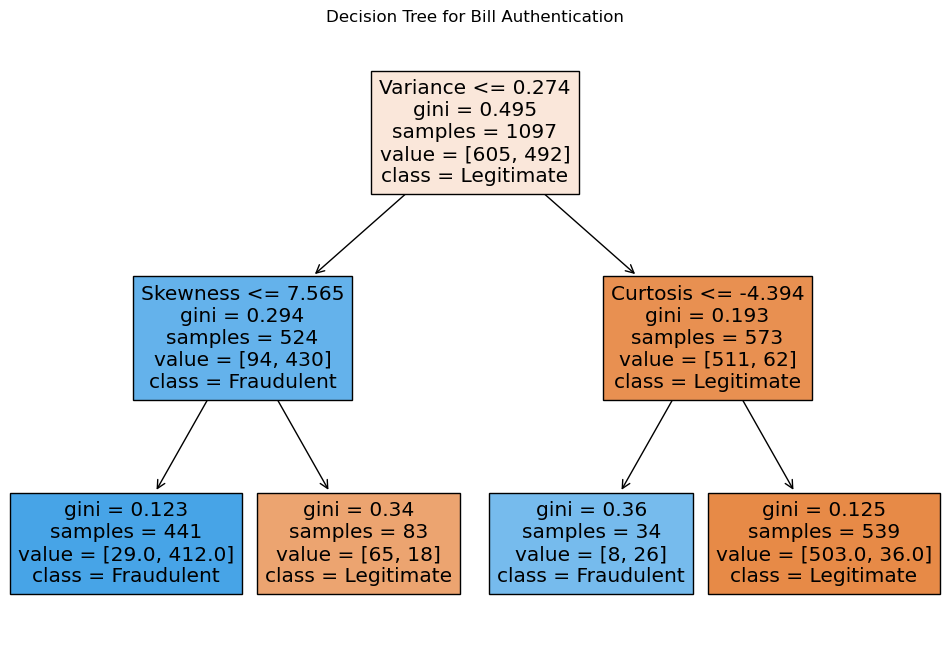

In [42]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=predictors.columns, class_names=['Legitimate', 'Fraudulent'], filled=True)
plt.title('Decision Tree for Bill Authentication')
plt.show()

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the Decision Tree Classification Model: {0}%'.format(accuracy))


Accuracy of the Decision Tree Classification Model: 90.9090909090909%


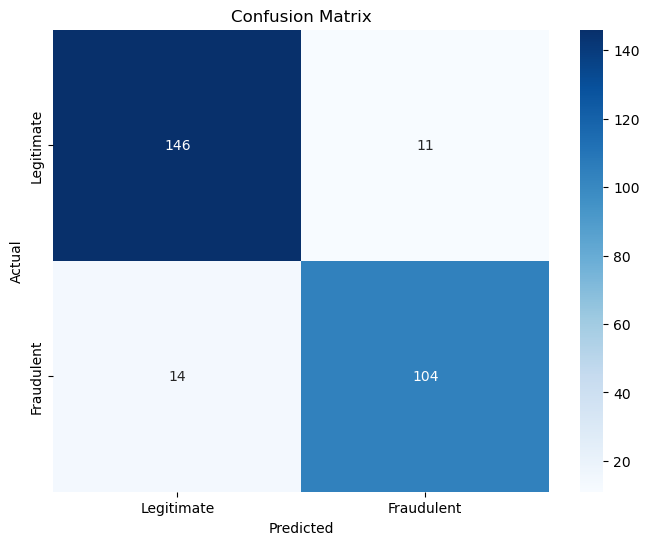

In [80]:
import seaborn as sns

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraudulent'], 
            yticklabels=['Legitimate', 'Fraudulent'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Example 2: Mushroom

## Importing Libraries and Dataset

In [202]:
# Import the necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

In [204]:
# Load the dataset
dataset = pd.read_csv('mushrooms.csv')

## Exploratory data analysis 

In [207]:
# Check the first five rows of the dataset
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [209]:
# Check the null values 
dataset.isnull().sum().sum()

0

In [211]:
# Retrieve the unique values from the column 
dataset['class'].unique()

array(['p', 'e'], dtype=object)

In [214]:
# To see if there is any null values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [216]:
# To find number of rows and column
dataset.shape

(8124, 23)

<Axes: xlabel='class', ylabel='Count'>

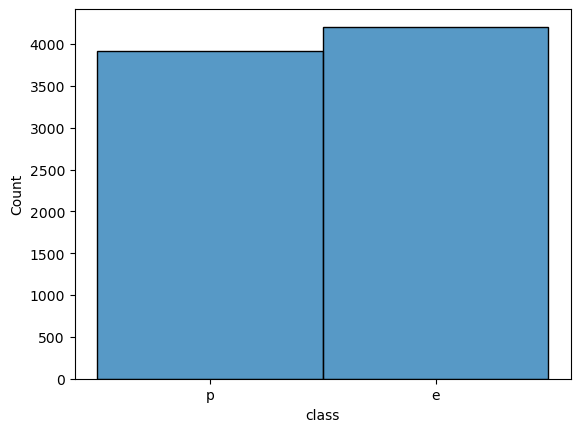

In [218]:
# Histogram plot
sns.histplot(dataset['class'])

## Separating Features and Target

Target is in column class. So X will have all values apart from column class and y will have column class

In [222]:
X = dataset.drop(['class'],axis=1)
y = dataset['class']

As all the values in the dataset are categorical.
X can be encoded using pandas dummy variable and y using LabelEncoder.

Dummy variable creates a separte column for each unique value of the column, where as LabelEncoder encodes target labels with value between 0 and n_classes-1. LabelEncoder should be used to encode target values, i.e. y, and not the input X.

In [225]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [227]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


For y variable encoding is done as
Poisonous = p -> 1
Edible = e -> 0

## Splitting Dataset to training and test data

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [233]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [235]:
y_train.shape , y_test.shape

((6499,), (1625,))

## Decision Tree Creation

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [240]:
from sklearn.metrics import accuracy_score

## Creation of Decision Tree using Gini Index

In [243]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388.0, 3111.0]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.15384615384615385, 0.375, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'x[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.002\nsamples = 2740\

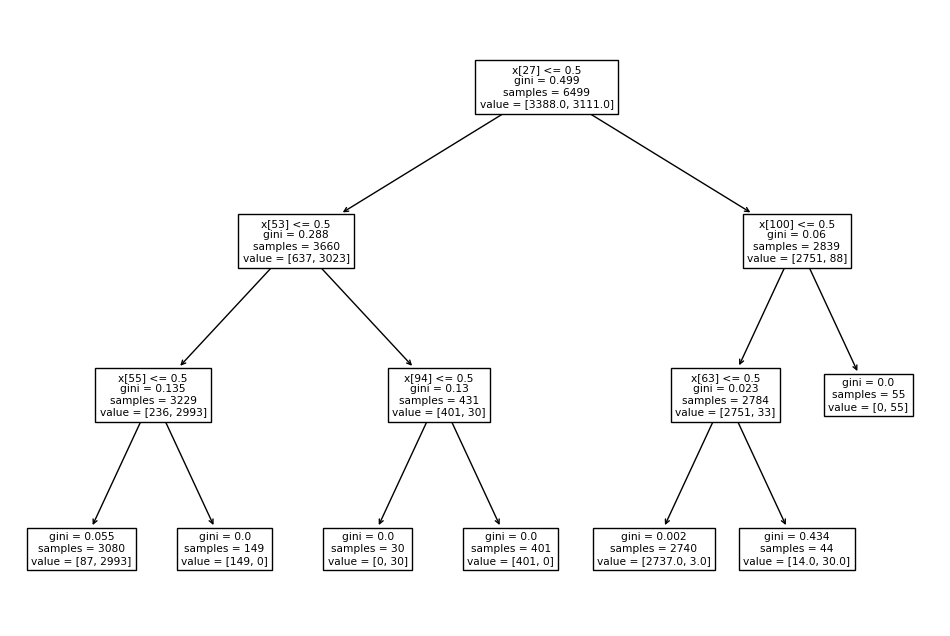

In [245]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [246]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)

Overfitting occurs when accuracy for traning set is high and test set is very low comparing to training set. Overfitting is very common problem with decision tree.

In [250]:
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 1, 1])

In [252]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9902
Training-set accuracy score: 0.9840


## Creation of Decision Tree using with entropy

In [255]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388.0, 3111.0]'),
 Text(0.3333333333333333, 0.625, 'x[20] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.2222222222222222, 0.375, 'x[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.7777777777777778, 0.625, 'x[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.6666666666666666, 0.375, 'x[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.012\nsamples = 2740\nvalue = [2737.0, 3.0]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.902\nsamples = 44\nvalue = [14.0, 30.0]'),
 Text(0.8888888888888888, 0.375, 'entr

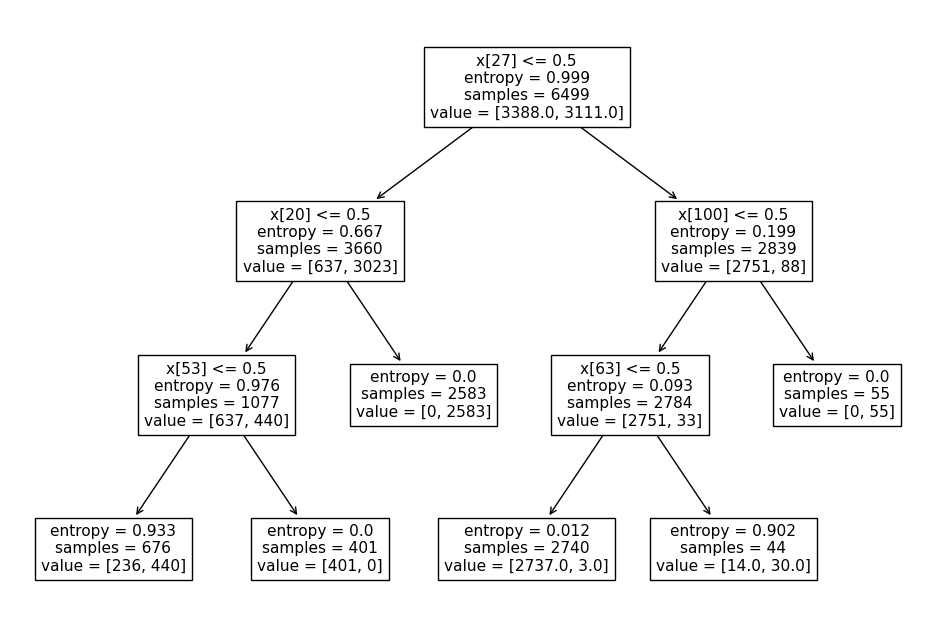

In [257]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [258]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)

In [261]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [263]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9637
Training-set accuracy score: 0.9611


In [265]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9611
Test set score: 0.9637


## Confusion Matrix 

In [268]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [270]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[766  54]
 [  5 800]]


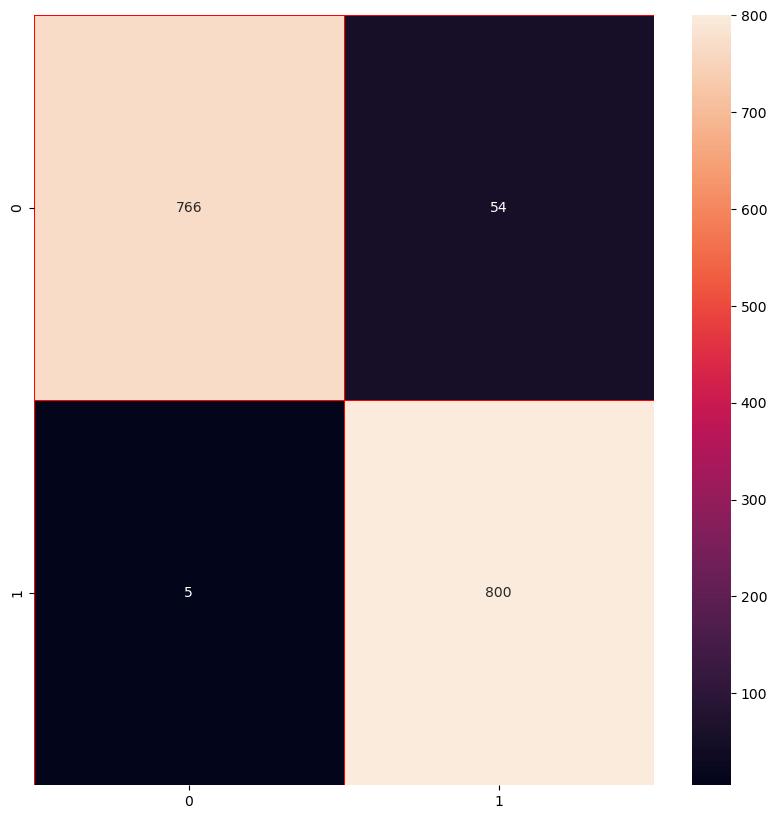

<Figure size 640x480 with 0 Axes>

In [272]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [274]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       820
           1       0.94      0.99      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



In [276]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.9644364074743822


## Conclusion

Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting.

## Example 3 for Practice

### Recall heart disease data in Naive Bayes classifier?

In [84]:
#load file as a dataframe
df = pd.read_csv('processed.cleveland.csv')
df

,age,sex,chestpain,restbps,cholesterol,fastingbs,restecg,thalach,exerciseang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
